# GATHER DATA

In [1]:
# IMPORT PACKAGES
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [2]:
# IMPORT CSVs 

'''
A dataframe's name is formated as "advPassYR.csv" where we replace 'YR' with 
its numerical equivalent. For instance, if we wanted the data for 2022, it is
saved in a file named 'advPass22.csv'. 

The dataframe contains the entire league's defensive passing metrics, including
features such as passer rating allowed, Y/A allowed, sacks produced, etc.

We will store each dataframe in a list, this way we can store each dataframe
in one convenient data type. This allows us to automate the process of retrieving each
dataframe, as we can do this in one loop instead of manually storing each dataframe
to a single variable. 
'''

# Create list of years so it's easier to find CSVs
years = [18, 19, 20, 21, 22, 23]

# TODO: consider using a dictionary instead
# Create lists of dataframes
data = []
pass_data = []
def_data = []

# Create list of abbreviations for labeling purposes
abvs = ['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 
        'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LV', 'LAC', 
        'LAR', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 
        'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS']


# Goes through each dataframe in folder and adds it to lists

for year in years:
    file_name = "Data/advPass/advPass" + str(year) + ".csv"
    data.append(pd.read_csv(file_name))
    file_name = "Data/pass/pass" + str(year) + ".csv"
    pass_data.append(pd.read_csv(file_name))
    file_name = "Data/def/def" + str(year) + ".csv"
    def_data.append(pd.read_csv(file_name))

# Add in abvs as a column to dataframe
for x in data:
    x.insert(1, "Abv", abvs, True)

# Merge psr rtg feature into data (TODO: Turn this into a function?)
for x in range(len(data)):
    data[x] = pd.merge(data[x], pass_data[x][['Tm', 'Rate']], on='Tm', how='left')

# Rename some columns in def_data
for x in def_data:
    x.rename(columns={'Unnamed: 1_level_0': 'Tm', 'Unnamed: 3_level_0': 'PA'}, inplace=True)
# Merge PA feature into data
for x in range(len(data)):
    data[x] = pd.merge(data[x], def_data[x][['Tm', 'PA']], on='Tm', how='left')


In [3]:
#VERIFY CSV IMPORTS

'''
for x in data:
    print(x.head())

for x in pass_data:
    print(x.head())
'''

print(data[0].head())

print(pass_data[0].head())

print(def_data[0].head())

                  Tm  Abv   G  Att  Cmp   Yds  TD  DADOT   Air   YAC  ...  \
0  Arizona Cardinals  ARI  16  506  342  3262  21    7.1  1773  1799  ...   
1    Atlanta Falcons  ATL  16  585  398  4153  33    8.2  2380  1934  ...   
2   Baltimore Ravens  BAL  16  577  337  3360  21    8.3  2020  1684  ...   
3      Buffalo Bills  BUF  16  492  313  2867  22    7.2  1553  1482  ...   
4  Carolina Panthers  CAR  16  529  353  3847  32    8.7  2354  1695  ...   

   Hrry  Hrry%  QBKD QBKD%  Sk Prss  Prss%  MTkl  Rate     PA  
0    68  11.8%    38  7.5%  49  155  26.9%   124  96.1  425.0  
1    70  10.8%    30  5.1%  37  137  21.2%   112  98.3  423.0  
2    94  14.8%    47  8.1%  43  184  28.9%   105  80.6  287.0  
3    76  13.9%    41  8.3%  36  153  28.0%   137  82.6  374.0  
4    68  11.5%    25  4.7%  35  128  21.6%   104  99.6  382.0  

[5 rows x 22 columns]
    Rk                    Tm     G    Cmp    Att  Cmp%     Yds    TD  TD%  \
0  1.0         Buffalo Bills  16.0  313.0  492.0  63.

# CREATE HELPER FUNCTIONS

In [4]:
# DEFINE PERCENT FORMATTER FUNCTION
'''
This function formats the y-axis ticks as percentages.
This is important as we convert the list of percentages
into numerics and add back to percentage values.
'''
def percent_formatter(x, pos):
    return f'{x}%'


In [5]:
# DEFINE GRAPH FUNCTION 

'''
These parameters take in the dataframe, the year of data you want, 
the column of data (i.e. the dependent variable) you want to compare with 
vs the blitz% (and only the blitz%), what you want to label the dependent variable,
and whether to add a percentage sign to the y-axis.

TLDR: Parameters are, respectively, the dataframe, dataframe's year, dependent var, dependent var's label, add
percentage sign to y-axis ticks.

This function will take the parameters and graph the plot between the user's desired dependent variable
to the blitz%.

Additionally it will find the median of the dependent variable as well as the number Wink's defenses attained.

If we want to generalize this function, we could theorhetically add another parameter that replaces blitz% with any 
independent variable a user chooses. We would also remove the markers designed specifically for Wink's defenses.
'''

def blitzGrapher(cur_data, year, col, ylab, prc=False):
    # Labels teams' data with their abbreviation
    for i, label in enumerate(cur_data['Abv']):
        plt.annotate(label, (cur_data['Bltz%'][i], cur_data[col][i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Sorts teams to plot by ascending bltz%. This is needed for the data points to not be out of order.
    # Can't numerically sort since the percentage values are actually strings, not numericals.
    cur_data = cur_data.sort_values(by='Bltz%')

 
    if year < 22:
        row_index = cur_data[cur_data['Abv'] == 'BAL'].index[0]
        colors = ['blue' if label == 'NYG' else 'black' if label != 'BAL' else 'red' for label in cur_data['Abv']]
    else:
        row_index = cur_data[cur_data['Abv'] == 'NYG'].index[0]
        colors = ['purple' if label == 'BAL' else 'black' if label != 'NYG' else 'red' for label in cur_data['Abv']]

    # Create plots
    plt.scatter(cur_data['Bltz%'], cur_data[col], color=colors)

    if prc==True:
        # Create a formatter using the percent_formatter function
        formatter = FuncFormatter(percent_formatter)

        # Apply the formatter to the y-axis ticks
        plt.gca().yaxis.set_major_formatter(formatter)

    # Add labels and title
    plt.xlabel('Blitz Rate')
    plt.ylabel(ylab)
    plt.title('Blitz Rate vs ' + ylab + ' 20' + str(year))

    plt.xticks(range(1, 32, 6))

    # Add line for median num of league sacks and line for num of Wink sacks respectively
    plt.axhline(cur_data[col].median(), color='green', linestyle='--', linewidth=2)
    plt.axhline(cur_data.at[row_index, col], color='red', linestyle='--', linewidth=2)

    # Add legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

In [6]:
# CONVERT BLITZ% INTO NUMERIC

'''
This is not a function but it is important to
convert blitz% into numeric in order to find the  
correlation between blitz% and other features.
'''

bltz_percent = []

for x in range(len(data)):
    cur_data = data[x]
    bltz_percent.append(cur_data['Bltz%'].str.replace('%', ''))

for i in range(len(bltz_percent)):
    for j in range(len(bltz_percent[i])):
        bltz_percent[i][j] = float(bltz_percent[i][j])

# CREATE GRAPHS

- ## Blitz vs Sacks

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


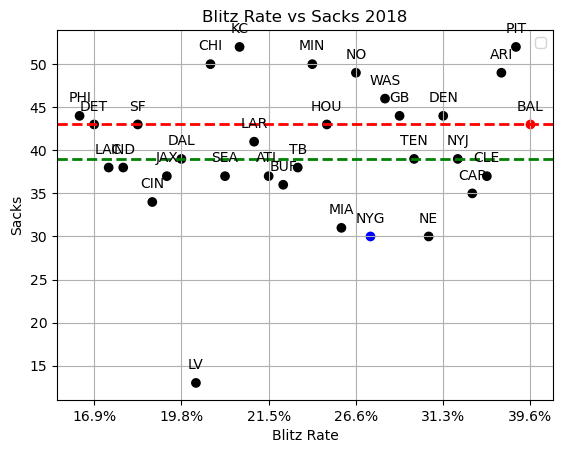

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


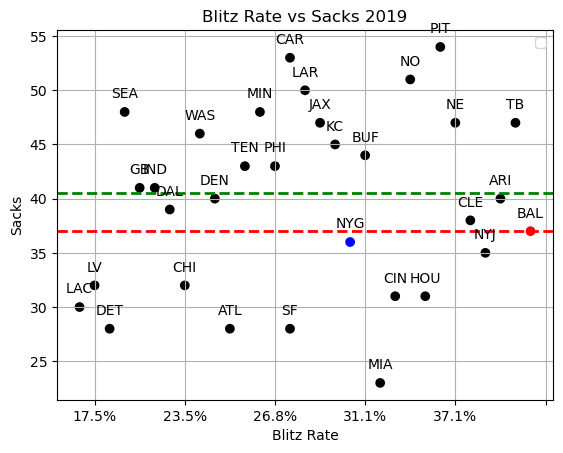

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


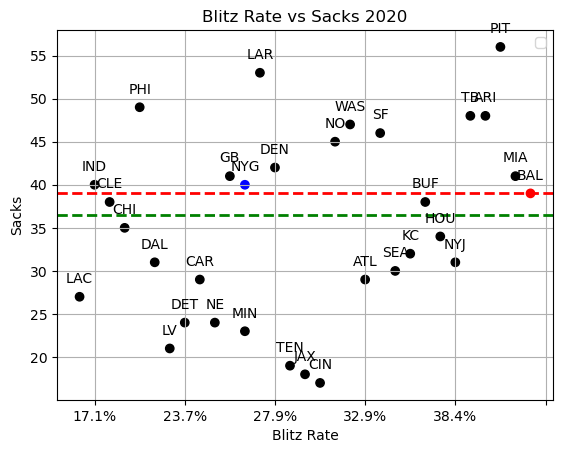

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


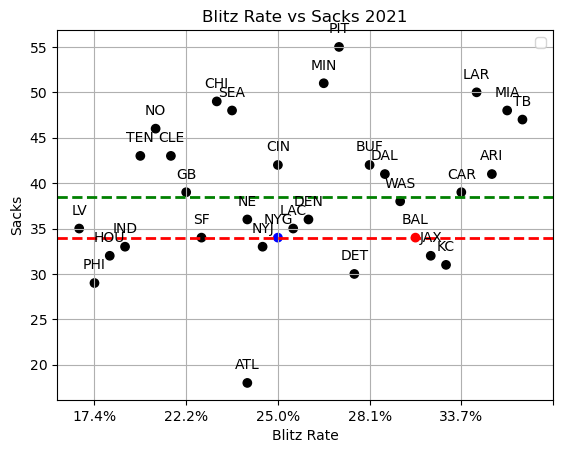

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


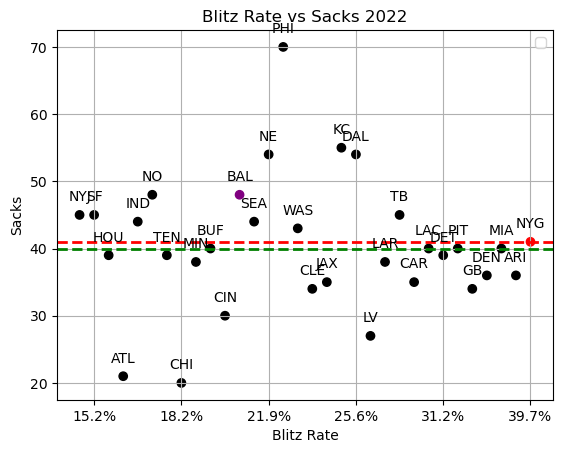

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


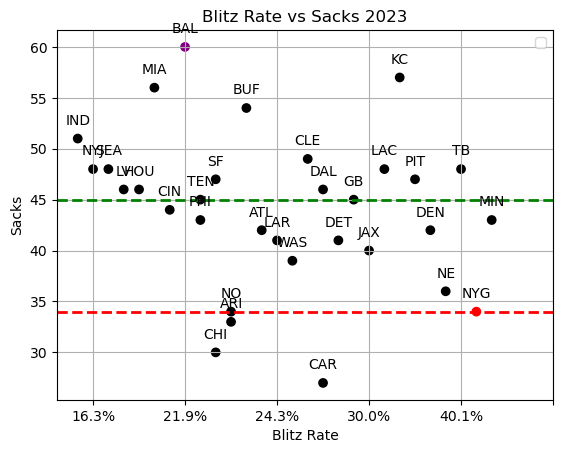

In [7]:
# CREATE BLITZ vs SACK GRAPHS

'''
We take the list of the dataframes, go through each dataframe and each 
year in the data frame, and we graph the number of sacks vs blitz rate.
'''

for x in range(len(data)):
    blitzGrapher(data[x], years[x], 'Sk', 'Sacks')

In [8]:
# FIND CORRELATIONS B/W BLTZ% & SKs

for x in range(len(data)):
    cur_data = data[x]
    print("The correlation b/w BLTZ% and SKs in 20" + str(years[x]) + " is " + str(bltz_percent[x].corr(cur_data['Sk'])))

The correlation b/w BLTZ% and SKs in 2018 is 0.18104377708635822
The correlation b/w BLTZ% and SKs in 2019 is 0.1678191052254649
The correlation b/w BLTZ% and SKs in 2020 is 0.2908726176299426
The correlation b/w BLTZ% and SKs in 2021 is 0.27019556191600713
The correlation b/w BLTZ% and SKs in 2022 is -0.051130895264602884
The correlation b/w BLTZ% and SKs in 2023 is -0.18735197856795616


In [9]:
# CREATE GRAPH w/o POINTS
# TODO: Fix this 
'''
cur_data = data[0]
cur_data = cur_data.sort_values(by='Bltz%')

# Create a scatter plot without markers
for index, row in cur_data.iterrows():
    plt.text(row['Bltz%'], row['Sk'], row['Abv'], fontsize=12, ha='center', va='center')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Labels Only')

plt.grid(True)
plt.show()
'''

"\ncur_data = data[0]\ncur_data = cur_data.sort_values(by='Bltz%')\n\n# Create a scatter plot without markers\nfor index, row in cur_data.iterrows():\n    plt.text(row['Bltz%'], row['Sk'], row['Abv'], fontsize=12, ha='center', va='center')\n\n# Add labels and title\nplt.xlabel('X-axis Label')\nplt.ylabel('Y-axis Label')\nplt.title('Scatter Plot with Labels Only')\n\nplt.grid(True)\nplt.show()\n"

- ## Blitz vs Pressure%

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


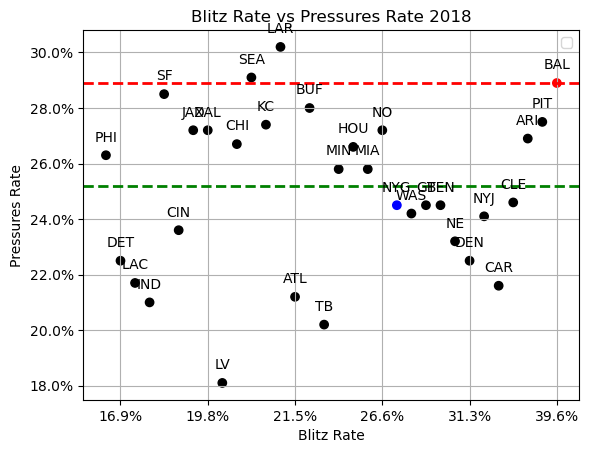

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


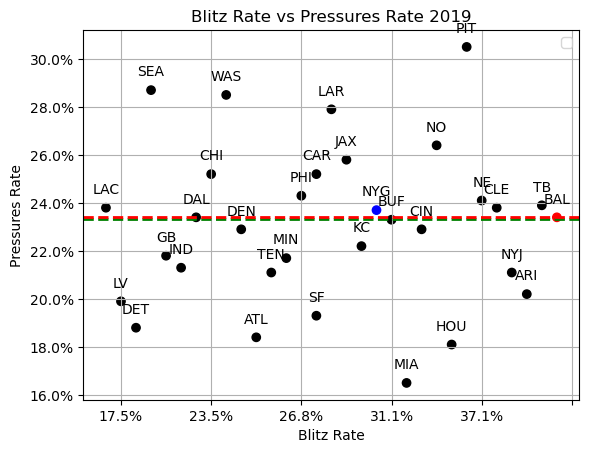

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


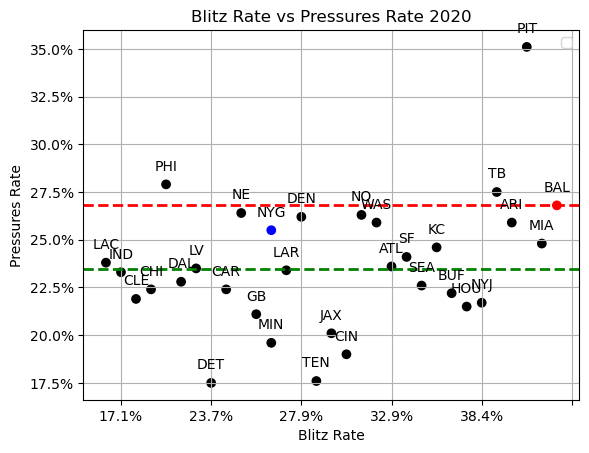

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


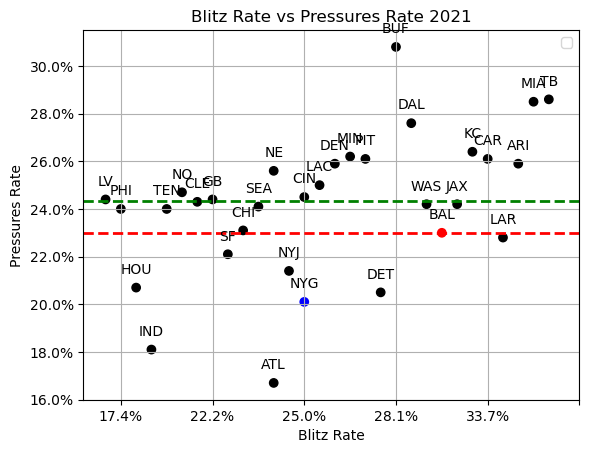

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


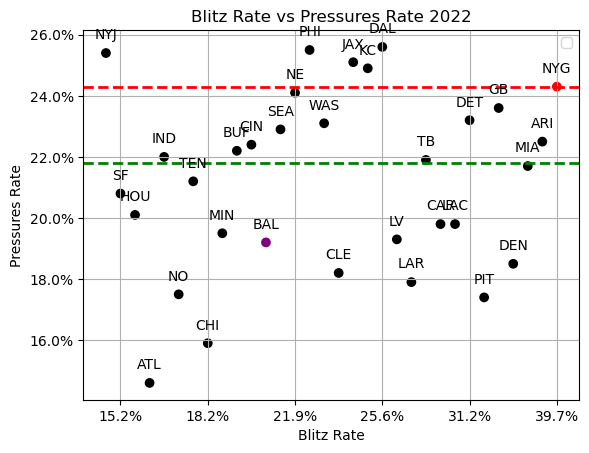

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


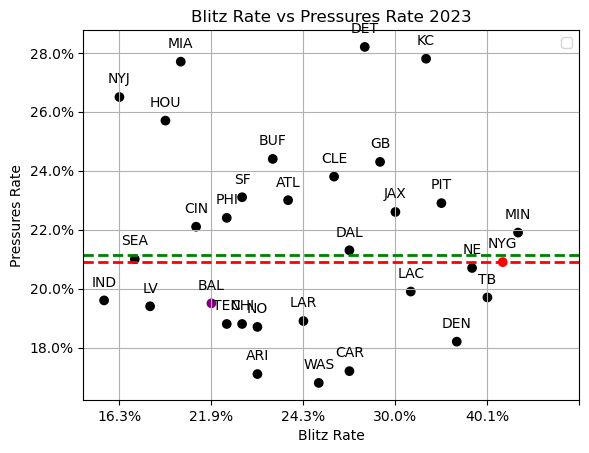

In [10]:
# CREATE BLITZ vs PRESSURE% Graph

# print(data[0].head())

# TODO: resolve 'Prss%' to numeric (Resolved)
# SOLs: - sort Prss% like blitz%
#       - convert string to numerical by removing % and dividing by 100 (Resolved)

# print(data[0].dtypes)


    
for x in range(len(data)):
    data[x]['Prss'] = data[x]['Prss%'].str.strip('%').astype(float)
    blitzGrapher(data[x], years[x], 'Prss', 'Pressures Rate', True)

In [11]:
# FIND CORRELATION BETWEEN BLITZ% AND PRSS%

for x in range(len(data)):
    cur_data = data[x]
    print("The correlation b/w BLTZ% and PRSS% in 20" + str(years[x]) + " is " + str(bltz_percent[x].corr(cur_data['Prss'])))

The correlation b/w BLTZ% and PRSS% in 2018 is 0.10391559163250932
The correlation b/w BLTZ% and PRSS% in 2019 is 0.06456471052616543
The correlation b/w BLTZ% and PRSS% in 2020 is 0.33127444406144047
The correlation b/w BLTZ% and PRSS% in 2021 is 0.4556891123890515
The correlation b/w BLTZ% and PRSS% in 2022 is 0.14755553216688433
The correlation b/w BLTZ% and PRSS% in 2023 is -0.02786973954638392


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


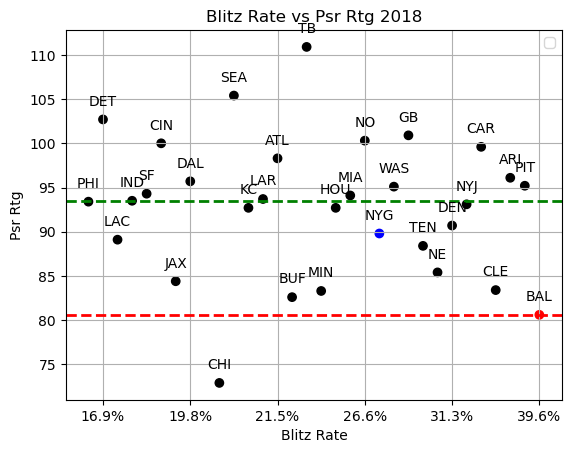

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


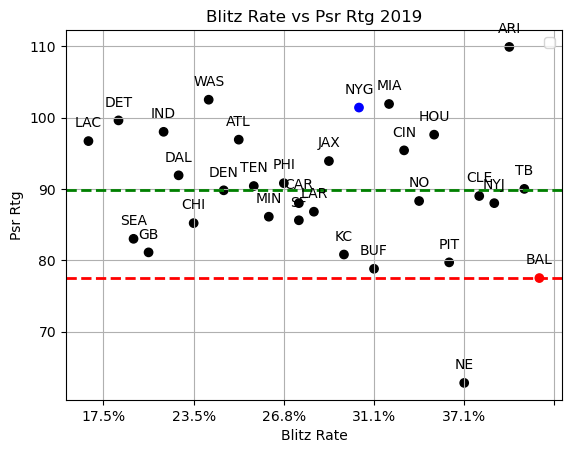

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


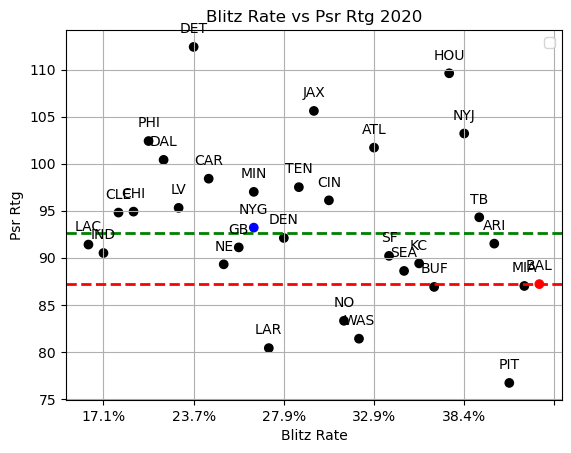

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


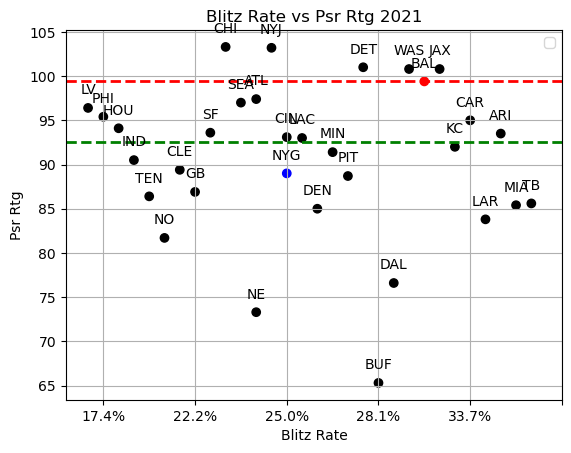

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


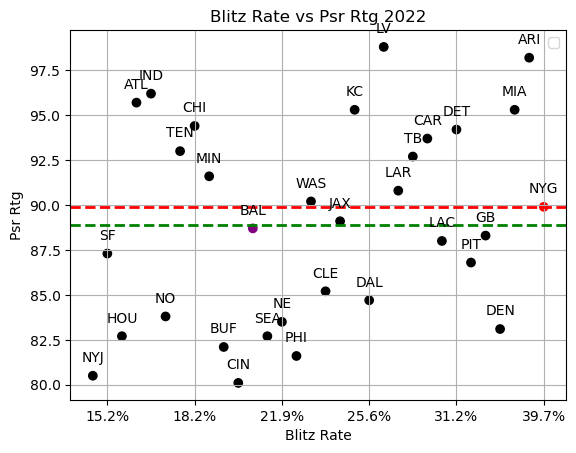

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


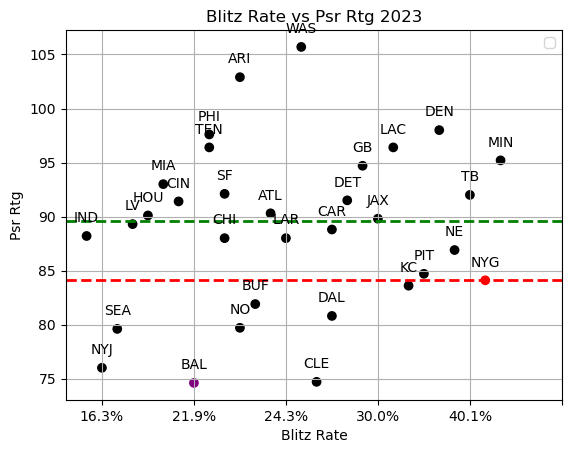

In [12]:
# CREATE BLITZ% AND PSR RTG GRAPH

# TODO: Need to account for blitz% and psr rtg being in two different CSVs
# SOL: - Fix function 
#      - Add psr rtg as a feature in existing CSVs

for x in range(len(data)):
    blitzGrapher(data[x], years[x], "Rate", "Psr Rtg")

In [13]:
# FIND CORRELATION BETWEEN BLITZ% AND PSR RTG
for x in range(len(data)):
    cur_data = data[x]
    print("The correlation b/w BLTZ% and Psr Rtg in 20" + str(years[x]) + " is " + str(bltz_percent[x].corr(cur_data['Rate'])))

The correlation b/w BLTZ% and Psr Rtg in 2018 is -0.14021192735293034
The correlation b/w BLTZ% and Psr Rtg in 2019 is -0.2510792140858357
The correlation b/w BLTZ% and Psr Rtg in 2020 is -0.24214336368537273
The correlation b/w BLTZ% and Psr Rtg in 2021 is -0.1299139761111463
The correlation b/w BLTZ% and Psr Rtg in 2022 is 0.26387645373749086
The correlation b/w BLTZ% and Psr Rtg in 2023 is 0.14698988168205532


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


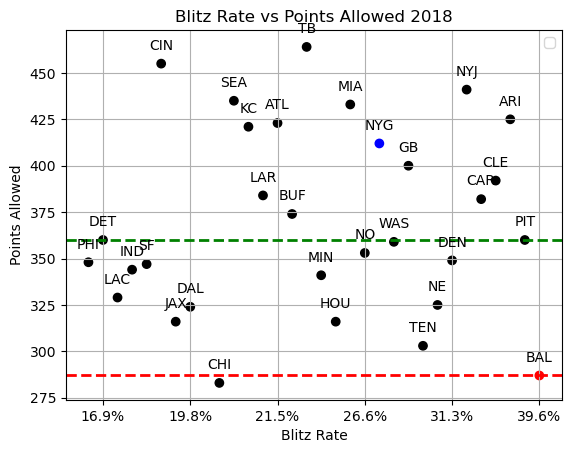

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


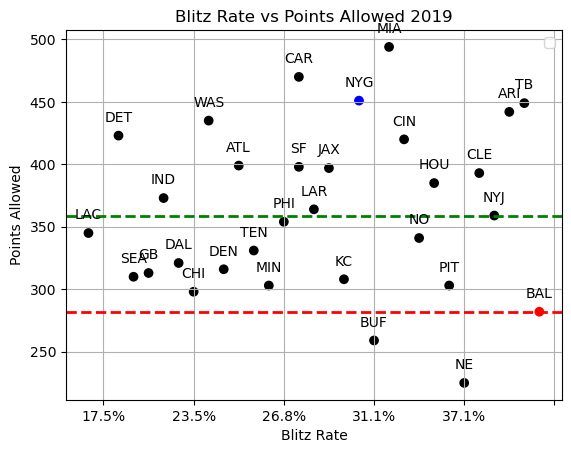

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


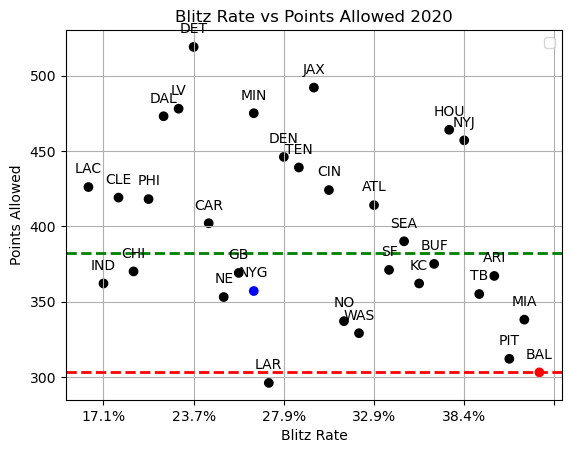

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


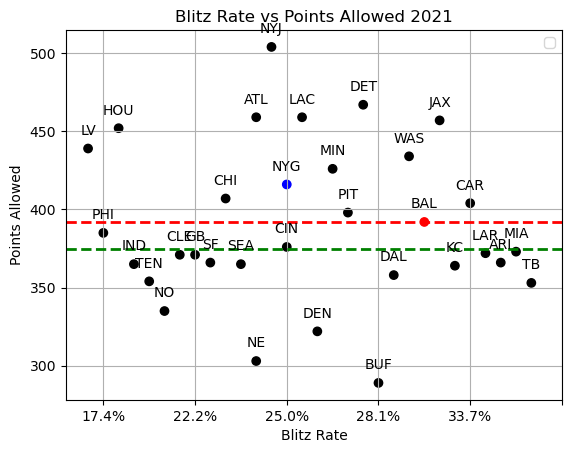

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


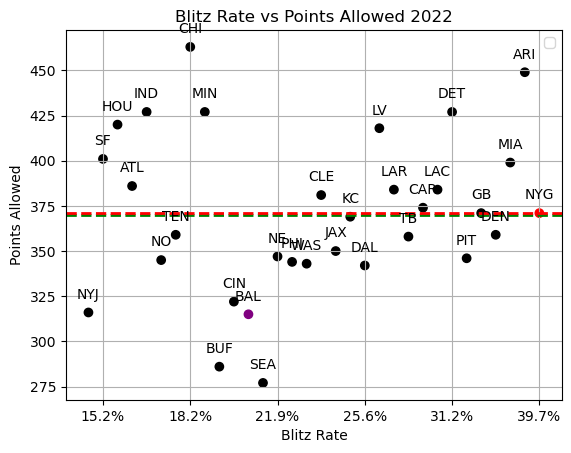

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


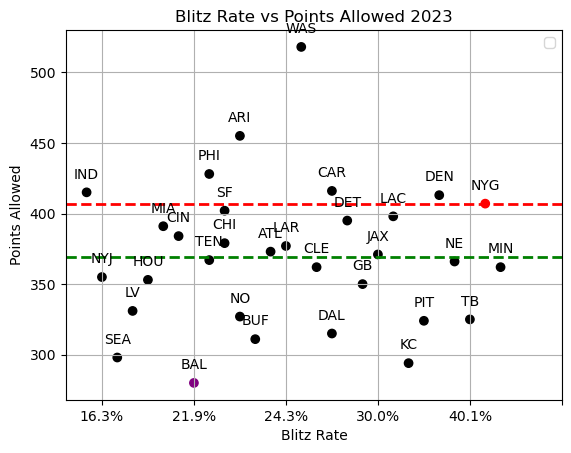

In [14]:
# GRAPH BETWEEN BLITZ% AND PTs
# Need to convert PA from object to floats
for x in range(len(data)):
    data[x]['PA'] = data[x]['PA'].astype(float)

for x in range(len(data)):
    blitzGrapher(data[x], years[x], "PA", "Points Allowed")

In [15]:
# FIND CORRELATION BETWEEN BLITZ% AND PRSS%

for x in range(len(data)):
    cur_data = data[x]
    print("The correlation b/w BLTZ% and PA in 20" + str(years[x]) + " is " + str(bltz_percent[x].corr(cur_data['PA'])))

The correlation b/w BLTZ% and PA in 2018 is 0.018459812681167156
The correlation b/w BLTZ% and PA in 2019 is -0.017620354980965047
The correlation b/w BLTZ% and PA in 2020 is -0.35528761898511013
The correlation b/w BLTZ% and PA in 2021 is -0.13562836261773373
The correlation b/w BLTZ% and PA in 2022 is 0.1294244537000393
The correlation b/w BLTZ% and PA in 2023 is -0.010072345402480108


# TODO: Implement following analyses:

- ~~**Correlation between blitz% & press%** (probably the most salient since his main defensive principle is to pressure QB)~~
- ~~Correlation between passer rating & blitz%. Need to see blitz% overall effects on passing defense.~~
- Correlation between QB hits & bltiz% (maybe QB hit rate too?)
- Correlation between EXP & blitz% (EXP is considered by some as the ultimate (or most comprehensive) stat)
    * ~~PA & blitz%~~
- Correlation between sck% & blitz%. (Probably the least important feature as we already have sack numbers)
- Correlation between Y/C & blitz%. Need to see if this is jeopardizing run D and can explain Witz's terrible run defenses.
    * This will require some more data importing as run D stats will likely be in another CSV
- Organize the code s.t. there is a header above each code chunk (e.g. header above chunk that plots sck% & blitz%)
    * Rename these headers to be less repetitive
- ~~Compare NYG's stats before Wink's arrival~~
    * ~~Compare BAL's stats after Wink's departure~~